## recovery 전처리 시작

In [1]:
import pandas as pd

In [2]:
df_recovery=pd.read_csv('../../datasets/reviews_data/recovery.csv')

### 불용어 처리 및 한글자 살리기 및 단어 치환

#### 전처리 필요한 파일들 가져오기

In [3]:
# 불용어 
df_stop = pd.read_excel('../../datasets/dic/stopword_list.xlsx')
df_stop[-2:]

,stopword
1177,\r\n
1178,\n


#### 전처리 시작 
- 1. 형태소 분석 및 토큰화
- 2. 단어 치환
- 3. 불용어 처리

In [4]:
from konlpy.tag import Okt
from collections import Counter

# Okt 형태소 분석기 인스턴스 생성
okt = Okt()

# df_all['reveiw_replaced'] 열의 각 텍스트에 대해 중복 단어 제거 및 형태소 분석 수행
tokenized_reviews = []

# 필요한 품사 리스트 정의
desired_pos = ['Noun', 'Verb', 'Adjective', 'Adverb', 'Exclamation', 'Conjunction']

# 형태소 분석 결과를 담을 리스트 초기화
tokenized_reviews = []

for review_text in df_recovery['review_content']:
    try:
        # 형태소 분석 수행
        pos_result = okt.pos(review_text, norm=True, stem=True)
        
        # 필요한 조건을 만족하는 단어 선택
        filtered_tokens = []
        for word, pos in pos_result:
            if pos in desired_pos and len(word) > 1:
                filtered_tokens.append(word)
                    
        tokenized_reviews.append(filtered_tokens)  # 각 토큰을 개별 항목으로 유지
    except:
        pass

In [6]:
# 데이터프레임 df_all의 행 수 확인
df_all_shape = df_recovery.shape[0]

# tokenized_reviews 리스트의 길이 확인
tokenized_reviews_length = len(tokenized_reviews)

# 데이터프레임 df_all과 tokenized_reviews의 크기 비교
if df_all_shape == tokenized_reviews_length:
    print("데이터프레임 df_all과 tokenized_reviews의 크기가 일치합니다.")
else:
    print("데이터프레임 df_all과 tokenized_reviews의 크기가 일치하지 않습니다.")
    print(f"df_all의 행 수: {df_all_shape}")
    print(f"tokenized_reviews의 길이: {tokenized_reviews_length}")

데이터프레임 df_all과 tokenized_reviews의 크기가 일치합니다.


In [7]:
df_recovery['reveiw_replaced']=tokenized_reviews

In [8]:
# 불용어 목록을 리스트로 변환
stop_list = df_stop['stopword'].tolist()

# 불용어 처리 함수 정의
def stopword(tokens):
    removed_tokens = [word for word in tokens if word not in stop_list]
    return ' '.join(removed_tokens)

In [9]:
# df_all['origin_reviews'] 열의 각 리스트에 불용어 처리 적용하고 쪼개기
df_recovery['replaced_review'] = df_recovery['reveiw_replaced'].apply(stopword)

In [10]:
df_recovery[:5]

,Unnamed: 0,product_name,review_date,review_content,review_star,review_writer,reveiw_replaced,replaced_review
0,0,"[조아제약] 블랙마카 마스터클래스 아르기닌 야관문 흑마늘 활력강화, 60정, 810...",2023.09.07,일주일 정도 먹은거 같은데 좋아요..피곤한 느낌이 많이 사라졌네요..\r\n맛은 뭐...,5.0,이*철,"[일주일, 정도, 먹다, 같다, 좋다, 피곤하다, 느낌, 많이, 사라지다, 그냥, ...",좋다 피곤하다 사라지다 삼키다
1,1,"[조아제약] 블랙마카 마스터클래스 아르기닌 야관문 흑마늘 활력강화, 60정, 810...",2023.08.05,복용한지 얼마되지않았지만 피로회복 활력증강에 좋은것 같아요,5.0,김*운,"[복용, 한지, 얼마, 되다, 않다, 피로, 회복, 증강, 좋다, 같다]",복용 한지 피로 회복 증강 좋다
2,2,"[조아제약] 블랙마카 마스터클래스 아르기닌 야관문 흑마늘 활력강화, 60정, 810...",2022.06.02,함량 높으면서도 품질 좋은 제품이라 믿고 구매했어요. 항상 체력적인 부분이 굉장히 ...,5.0,한*선,"[함량, 높다, 품질, 좋다, 제품, 믿다, 구매, 하다, 항상, 체력, 부분, 굉...",함량 높다 품질 좋다 제품 믿다 구매 항상 체력 굉장하다 힘들다 한약 먹어주다 체력...
3,3,"[조아제약] 블랙마카 마스터클래스 아르기닌 야관문 흑마늘 활력강화, 60정, 810...",2022.05.30,요즘 업무강도가 세져서 인지 집에만 오면 입맛도 없어 하고\r\n힘들어 하길래 구매...,5.0,노해바라기,"[요즘, 업무, 강도, 세다, 인지, 오다, 입맛, 없다, 하다, 힘들다, 하다, ...",업무 강도 세다 인지 입맛 힘들다 구매 해주다 성분 좋다 함량 높다 괜찮다 알약 타...
4,4,"[조아제약] 블랙마카 마스터클래스 아르기닌 야관문 흑마늘 활력강화, 60정, 810...",2022.05.25,코로나 확진 이후 떨어진 컨디션이 쉽게 올라오질 않아서요. 블랙마카가 남자한테 특화...,5.0,최*득,"[코로나, 확진, 이후, 떨어지다, 컨디션, 쉬다, 올라오다, 않다, 블랙, 마카,...",코로나 확진 떨어지다 컨디션 쉬다 올라오다 블랙 마카 특화된 양제 기울다 사다 블랙...


In [11]:
# ' '이 포함된 레코드를 찾아서 제거
df_recovery = df_recovery[df_recovery['replaced_review'] != '']

In [12]:
df_recovery.to_csv('./recovery_preprocess.csv')

In [13]:
df_recovery

,Unnamed: 0,product_name,review_date,review_content,review_star,review_writer,reveiw_replaced,replaced_review
0,0,"[조아제약] 블랙마카 마스터클래스 아르기닌 야관문 흑마늘 활력강화, 60정, 810...",2023.09.07,일주일 정도 먹은거 같은데 좋아요..피곤한 느낌이 많이 사라졌네요..\r\n맛은 뭐...,5.0,이*철,"[일주일, 정도, 먹다, 같다, 좋다, 피곤하다, 느낌, 많이, 사라지다, 그냥, ...",좋다 피곤하다 사라지다 삼키다
1,1,"[조아제약] 블랙마카 마스터클래스 아르기닌 야관문 흑마늘 활력강화, 60정, 810...",2023.08.05,복용한지 얼마되지않았지만 피로회복 활력증강에 좋은것 같아요,5.0,김*운,"[복용, 한지, 얼마, 되다, 않다, 피로, 회복, 증강, 좋다, 같다]",복용 한지 피로 회복 증강 좋다
2,2,"[조아제약] 블랙마카 마스터클래스 아르기닌 야관문 흑마늘 활력강화, 60정, 810...",2022.06.02,함량 높으면서도 품질 좋은 제품이라 믿고 구매했어요. 항상 체력적인 부분이 굉장히 ...,5.0,한*선,"[함량, 높다, 품질, 좋다, 제품, 믿다, 구매, 하다, 항상, 체력, 부분, 굉...",함량 높다 품질 좋다 제품 믿다 구매 항상 체력 굉장하다 힘들다 한약 먹어주다 체력...
3,3,"[조아제약] 블랙마카 마스터클래스 아르기닌 야관문 흑마늘 활력강화, 60정, 810...",2022.05.30,요즘 업무강도가 세져서 인지 집에만 오면 입맛도 없어 하고\r\n힘들어 하길래 구매...,5.0,노해바라기,"[요즘, 업무, 강도, 세다, 인지, 오다, 입맛, 없다, 하다, 힘들다, 하다, ...",업무 강도 세다 인지 입맛 힘들다 구매 해주다 성분 좋다 함량 높다 괜찮다 알약 타...
4,4,"[조아제약] 블랙마카 마스터클래스 아르기닌 야관문 흑마늘 활력강화, 60정, 810...",2022.05.25,코로나 확진 이후 떨어진 컨디션이 쉽게 올라오질 않아서요. 블랙마카가 남자한테 특화...,5.0,최*득,"[코로나, 확진, 이후, 떨어지다, 컨디션, 쉬다, 올라오다, 않다, 블랙, 마카,...",코로나 확진 떨어지다 컨디션 쉬다 올라오다 블랙 마카 특화된 양제 기울다 사다 블랙...
...,...,...,...,...,...,...,...,...
21769,21769,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.07.15,배송 빨라요 성능 성능이 별로예요 유통기한 기한이 넉넉해요\r\n2박스 먹어봤으나 ...,2.0,rkdg****,"[배송, 빨르다, 성능, 성능, 별로, 유통, 기한, 기한, 넉넉하다, 박스, 먹다...",빨르다 별로 박스 피로 회복 안되다 드네
21770,21770,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.07.07,배송 빨라요 성능 성능이 별로예요 유통기한 보통이에요\r\n호불호가 있을지 모르겠지...,2.0,macg****************,"[배송, 빨르다, 성능, 성능, 별로, 유통, 기한, 보통, 호불호, 있다, 모르다...",빨르다 별로 호불호 모르다 먹기 포기
21771,21771,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.06.16,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요,5.0,rkdg****,"[배송, 빨르다, 성능, 성능, 뛰어나다, 유통, 기한, 기한, 넉넉하다]",빨르다 뛰어나다
21772,21772,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.04.06,배송 보통이에요 성능 보통이에요 유통기한 보통이에요\r\n지인 선물을줬는데 좋아했어요,5.0,채슨생,"[배송, 보통, 성능, 보통, 유통, 기한, 보통, 지인, 선물, 주다, 좋아하다]",지인 선물 좋아하다


### 토큰화 리뷰 빈도 계산

##### 형태소 빈도를 계산 

In [14]:
combined_text = df_recovery['replaced_review']

In [15]:
from collections import Counter
from wordcloud import WordCloud

In [16]:
combined_text = ' '.join(df_recovery['replaced_review'])

In [17]:
# 단어 빈도수 카운트
word_counts = Counter(combined_text.split())

In [18]:
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 단어 빈도수 딕셔너리를 WordCloud에 전달
wordcloud = WordCloud(font_path=font_path, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

In [19]:
wordcloud.words_

{'좋다': 1.0,
 '비타민': 0.6583263830970253,
 '제품': 0.5053748494115466,
 '구매': 0.47660087109628396,
 '복용': 0.31206561023074786,
 '건강': 0.31035121860809933,
 '양제': 0.2840329904550088,
 '꾸준하다': 0.276619405059772,
 '가격': 0.2754610323417663,
 '섭취': 0.27337596144935594,
 '도움': 0.2586877953850431,
 '빨르다': 0.20776573070151053,
 '피로': 0.19910110277082754,
 '아니다': 0.16722268557130943,
 '먹기': 0.16370123250857196,
 '알약': 0.16175516634232232,
 '성분': 0.15929941618015012,
 '크다': 0.15253451950699656,
 '주문': 0.14924474098786025,
 '후기': 0.14493559447687887,
 '피곤하다': 0.1431285330367899,
 '괜찮다': 0.14132147159670094,
 '뛰어나다': 0.13886572143452877,
 '구입': 0.1353442683717913,
 '많다': 0.1328421833008989,
 '그렇다': 0.12797701788527477,
 '모르다': 0.12737466407191178,
 '크기': 0.12385321100917432,
 '편하다': 0.1210267815772403,
 '사다': 0.10508757297748124,
 '추천': 0.10443888425539802,
 '상태': 0.10402187007691595,
 '캡슐': 0.10226114354554722,
 '오메가': 0.0983690112130479,
 '작다': 0.0955425817811139,
 '해보다': 0.0954035770549532,
 '재다': 

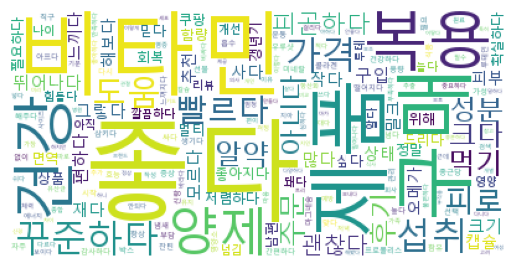

In [20]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis('off') 
plt.show()

##### 문장을 합쳐서 계산할때 

In [21]:
# 단어로 쪼개기 
text_split = combined_text.split()

In [22]:
# counter를 이용해서 중복 여부 count
from collections import Counter
Counter(text_split)

Counter({'좋다': 21582,
         '피곤하다': 3089,
         '사라지다': 465,
         '삼키다': 969,
         '복용': 6735,
         '한지': 317,
         '피로': 4297,
         '회복': 1749,
         '증강': 74,
         '함량': 1640,
         '높다': 1039,
         '품질': 296,
         '제품': 10907,
         '믿다': 1740,
         '구매': 10286,
         '항상': 1009,
         '체력': 774,
         '굉장하다': 230,
         '힘들다': 1533,
         '한약': 41,
         '먹어주다': 516,
         '도움': 5583,
         '부원': 209,
         '원하다': 171,
         '성분': 3438,
         '신경': 632,
         '써다': 498,
         '넘다': 1149,
         '업무': 123,
         '강도': 45,
         '세다': 118,
         '인지': 515,
         '입맛': 110,
         '해주다': 1386,
         '괜찮다': 3050,
         '알약': 3491,
         '타입': 318,
         '먹기': 3533,
         '크기': 2673,
         '크다': 3292,
         '넘김': 1495,
         '꾸준하다': 5970,
         '으쌰으쌰': 8,
         '코로나': 426,
         '확진': 45,
         '떨어지다': 1323,
         '컨디션': 513,
         '쉬다': 839

In [23]:
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

wordCloud = WordCloud(font_path=font_path, background_color='white') #인스턴스화 
wordCloud.generate_from_text(combined_text)

In [24]:
# count 
wordCloud.words_ 

{'좋다': 1.0,
 '제품': 0.9231784582893348,
 '빨르다 뛰어나다': 0.67740232312566,
 '복용': 0.5361668426610349,
 '아니다': 0.5316789862724393,
 '양제': 0.5311510031678986,
 '그렇다': 0.44535374868004224,
 '멀티 비타민': 0.4313621964097149,
 '피로 회복': 0.3508447729672651,
 '상태 깔끔하다': 0.34239704329461457,
 '많다': 0.32286166842661035,
 '비타민 비타민': 0.31916578669482576,
 '비타민 미네랄': 0.30543822597676873,
 '꾸준하다': 0.2932946145723337,
 '깔끔하다 좋다': 0.2719112988384372,
 '모르다': 0.23812038014783526,
 '꾸준하다 복용': 0.23600844772967264,
 '구입': 0.2336325237592397,
 '가격 괜찮다': 0.22360084477296727,
 '지아 잔틴': 0.22228088701161564,
 '주문': 0.2220168954593453,
 '먹기 편하다': 0.21304118268215416,
 '뛰어나다 빨르다': 0.20644139387539598,
 '싶다': 0.2006335797254488,
 '알약 크기': 0.19931362196409716,
 '알다': 0.1969376979936642,
 '비타민 늘다': 0.19297782470960928,
 '건강 식품': 0.19086589229144668,
 '좋다 제품': 0.18664202745512143,
 '가격 싸다': 0.18505807814149947,
 '구매': 0.1842661034846885,
 '종합 비타민': 0.18294614572333687,
 '남편': 0.18004223864836325,
 '정말': 0.17740232312565998,


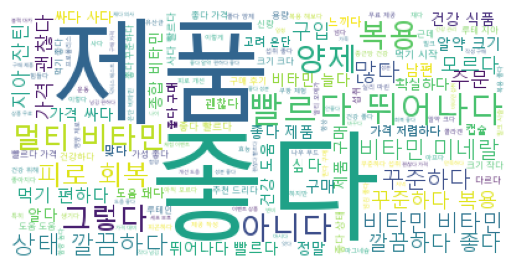

In [25]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off') 
plt.show()

### 별점으로 나눠보기

In [26]:
negative = df_recovery['review_star'] <= 3 
df_recovery_negative = df_recovery[negative]

In [27]:
positive = df_recovery['review_star'] > 3 
df_recovery_positive = df_recovery[positive]

In [28]:
df_recovery_negative.to_csv('./recovery_negative.csv')

In [29]:
df_recovery_positive.to_csv('./recovery_positive.csv')

#### negative 
- 별점 1,2,3

In [ ]:
import pandas as pd

In [ ]:
# negative = df_eyes['review_star'] <= 3 
# df_eyes_negative = df_eyes[negative]

In [ ]:
# df_eyes_negative.to_csv('./eyes_negative.csv')

In [ ]:
# positive = df_eyes['review_star'] > 3 
# df_eyes_positive = df_eyes[positive]

In [ ]:
# df_eyes_positive.to_csv('./eyes_positive.csv')

In [ ]:
df_eyes_negative = pd.read_csv('./eyes_negative.csv')

In [ ]:
from gensim.corpora import Dictionary

In [ ]:
type(df_eyes_negative['replaced_review'])

In [ ]:
# 'replaced_review' 열의 모든 값을 문자열로 변환
df_eyes_negative['replaced_review'] = df_eyes_negative['replaced_review'].astype(str)

In [ ]:
negative_review = df_eyes_negative['replaced_review'].apply(lambda x: x.split()).values

In [ ]:
negative_review

In [ ]:
dictionary = Dictionary(negative_review)
dictionary

In [ ]:
dictionary.doc2bow(negative_review[3])

In [ ]:
# dictionary에 의한 한글 문장을 벡터화 변환
corpus_list = list()
for sentence in negative_review :
  vectors = dictionary.doc2bow(sentence)
  corpus_list.append(vectors)

In [ ]:
df_eyes_negative['문장벡터화'] = corpus_list

##### 토픽 잡기


In [ ]:
from gensim.models import LdaModel

In [ ]:
lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=7)

In [ ]:
lda_model.print_topics(num_words=7)

###### 최적 토픽 추출하기 

In [ ]:
sentences = df_eyes_negative['replaced_review']
sentences

In [ ]:
# 각 문장을 공백으로 나누어 리스트에 저장
tokenized_sentences = [sentence.split() for sentence in sentences]

In [ ]:
# 결과 출력
morphs_list = list()
for tokens in tokenized_sentences:
    morphs_list.append(tokens)
morphs_list

In [ ]:
preprocessed_sentences = morphs_list

In [ ]:
dictionary_sentences = Dictionary(preprocessed_sentences) # fix in like sklean
dictionary_sentences

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
start_topic = 2
end_topic = 10
coherence_scores = list()
perplexity_scores = list()
for topic_number in range(start_topic, end_topic+1):
    best_lda_model = LdaModel(corpus=corpus_list, id2word=dictionary_sentences, num_topics=topic_number) # fix
    coherenceModel = CoherenceModel(model=best_lda_model, texts=morphs_list, dictionary=dictionary_sentences)
    coherence_scores.append(coherenceModel.get_coherence()) # 일관성 점수
    perplexity_scores.append(best_lda_model.log_perplexity(corpus_list))

In [ ]:
import pandas as pd
scores = pd.DataFrame([coherence_scores,  perplexity_scores]).T
scores

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.lineplot(coherence_scores)
plt.show()
sns.lineplot(perplexity_scores)
plt.show()

##### LDA 시각화(review_negative)

In [ ]:
# %pip install --user pyLDAvis

In [ ]:
# !pip install gensim

In [ ]:
# !pip show pyLDAvis

In [ ]:
import pyLDAvis.gensim_models

In [ ]:
lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=3)

In [ ]:
lda_model.print_topics(num_words=4)

In [ ]:
negative_topic=lda_model.print_topics(num_words=4)

In [ ]:
type(negative_topic)

In [ ]:
df_negative_topic=pd.DataFrame(data=negative_topic)

In [ ]:
df_negative_topic.to_excel('./negative_topic.xlsx')

In [ ]:
pyLDAvis.enable_notebook() # 일반적인 python에선 불필요
result_visualized = pyLDAvis.gensim_models.prepare(lda_model, corpus_list, dictionary)

In [ ]:
pyLDAvis.display(result_visualized)

In [ ]:
# project_nutrients_review_negative_result_visualized.html
pyLDAvis.save_html(result_visualized, './eyes_review_negative_result_visualized.html')

#### positive
- 별점 4, 5

In [ ]:
df_eyes_positive = pd.read_csv('./eyes_positive.csv')

In [ ]:
# 'replaced_review' 열의 모든 값을 문자열로 변환
df_eyes_positive['replaced_review'] = df_eyes_positive['replaced_review'].astype(str)

In [ ]:
positive_review = df_eyes_positive['replaced_review'].apply(lambda x: x.split()).values

In [ ]:
positive_dictionary = Dictionary(positive_review)
positive_dictionary

In [ ]:
positive_dictionary.doc2bow(positive_review[10])

In [ ]:
# dictionary에 의한 한글 문장을 벡터화 변환
corpus_list_pos = list()
for sentence in positive_review :
  vectors = positive_dictionary.doc2bow(sentence)
  corpus_list_pos.append(vectors)

In [ ]:
df_eyes_positive['문장벡터화'] = corpus_list_pos

##### 토픽잡기

In [ ]:
lda_model_pos = LdaModel(corpus=corpus_list_pos, id2word=positive_dictionary, num_topics=4)

In [ ]:
lda_model_pos.print_topics(num_words=4)

###### 최적 토픽 잡기_긍정

In [ ]:
sentences_pos = df_eyes_positive['replaced_review']
sentences_pos

In [ ]:
# 각 문장을 공백으로 나누어 리스트에 저장
tokenized_sentences_pos = [sentence.split() for sentence in sentences_pos]

In [ ]:
# 결과 출력
morphs_list_pos = list()
for tokens in tokenized_sentences_pos:
    morphs_list_pos.append(tokens)
morphs_list_pos

In [ ]:
preprocessed_sentences = morphs_list_pos

In [ ]:
dictionary_sentences = Dictionary(preprocessed_sentences) # fix in like sklean
dictionary_sentences

In [ ]:
start_topic = 2
end_topic = 10
coherence_scores = list()
perplexity_scores = list()
for topic_number in range(start_topic, end_topic+1):
    best_pos_lda_model = LdaModel(corpus=corpus_list_pos, id2word=dictionary_sentences, num_topics=topic_number) # fix
    coherenceModel = CoherenceModel(model=best_pos_lda_model, texts=morphs_list_pos, dictionary=dictionary_sentences)
    coherence_scores.append(coherenceModel.get_coherence()) # 일관성 점수
    perplexity_scores.append(best_pos_lda_model.log_perplexity(corpus_list_pos))

In [ ]:
scores_pos = pd.DataFrame([coherence_scores,  perplexity_scores]).T
scores_pos

In [ ]:
sns.lineplot(coherence_scores)
plt.show()
sns.lineplot(perplexity_scores)
plt.show()

In [ ]:
pos_lda_model = LdaModel(corpus=corpus_list_pos, id2word=dictionary_sentences, num_topics=3)

In [ ]:
positive_topic=pos_lda_model.print_topics(num_words=4)

In [ ]:
pyLDAvis.enable_notebook() # 일반적인 python에선 불필요
result_visualized = pyLDAvis.gensim_models.prepare(pos_lda_model, corpus_list_pos, dictionary_sentences)

In [ ]:
df_positive_topic=pd.DataFrame(data=positive_topic)

In [ ]:
df_positive_topic.to_excel('./positive_topic.xlsx')

In [ ]:
pyLDAvis.display(result_visualized)

In [ ]:
# project_nutrients_review_negative_result_visualized.html
pyLDAvis.save_html(result_visualized, './eyes_review_positive_result_visualized.html')